# Лабораторная работа №8. Фильтрация и свёртка
## Жилкина Лада, 5130901/10202

In [33]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import scipy
import wave
from ipywidgets import interact
import ipywidgets as widgets
sys.path.append('../')
from thinkdsp import decorate, SquareSignal

## Упражнение 8.1
Что слyчится, если при увеличении ширины гауссова окна std не увеличивать число элементов в этом окне?

Если при увеличении ширины гауссова окна (kernel) не увеличивать число элементов в этом окне, то это приведет к изменению формы функции Гаусса и, как следствие, к изменению результатов свертки этого окна с изображением.

Ширина гауссова окна (стандартное отклонение, std) определяет уровень размытия, применяемого к изображению. Размытие увеличивается с шириной окна. При этом необходимо увеличить количество элементов, включенных в окно, чтобы сохранить форму функции Гаусса.

Если же число элементов не увеличивается, функция Гаусса станет более «плоской», и это приведет к менее эффективному размытию изображения. Кроме того, при увеличении окна может возникнуть проблема с вычислительной точностью, если сохраняется небольшое количество элементов, потому что значения элементов будут очень малыми.

Таким образом, чтобы добиться эффективного размытия изображения и сохранить форму функции Гаусса, необходимо увеличить количество элементов, расположенных внутри окна, при увеличении его ширины.

## Упражнение 8.2

Утверждается, что преобразование Фурье гауссовой кривой - также гауссова кривая. Для дискретного преобразования Фурье это сотношение прблизительно верно. Попробуем его на нескольких примерах. Что произойдет с преобразованием Фурье, если меняется std?

Рассмотрим как меняется преобразование Фурье в зависимости от параметра std.

Начнём с простого примера Гауссовой функции.

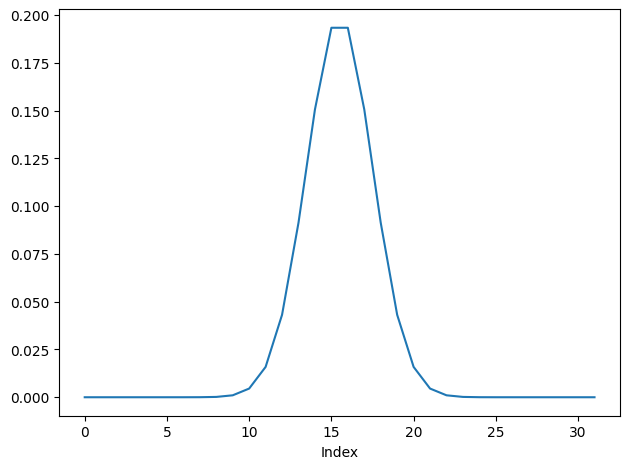

In [34]:
gaussian = scipy.signal.windows.gaussian(M=32, std=2)
gaussian /= sum(gaussian)
plt.plot(gaussian)
decorate(xlabel='Index')

Посмотрим на вид БПФ:

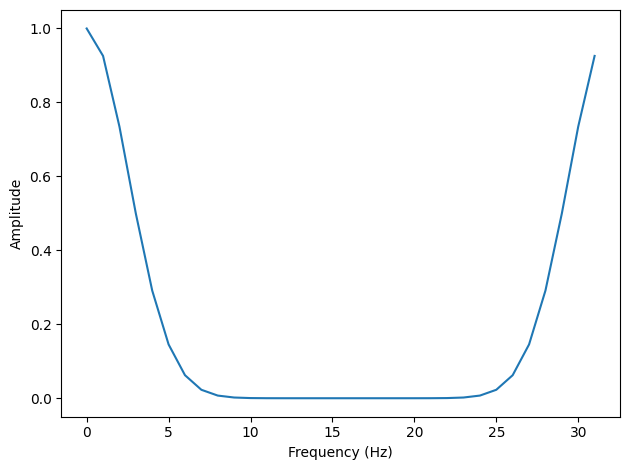

In [35]:
fft_gaussian = np.fft.fft(gaussian)
plt.plot(abs(fft_gaussian))
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

При прокрутке отрицательных частот влево сможем более четко увидеть, что это Гауссова функция:

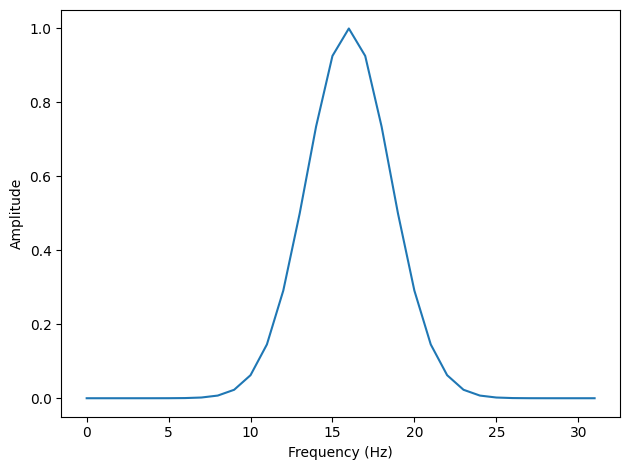

In [36]:
N = len(gaussian)
fft_rolled = np.roll(fft_gaussian, N//2)
plt.plot(abs(fft_rolled))
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Напишем функцию, которая строит окно Гаусса и его БПФ вместе:

In [37]:
def plot_gaussian(std):
    M = 32
    gaussian = scipy.signal.windows.gaussian(M=M, std=std)
    gaussian /= sum(gaussian)
    
    plt.subplot(1, 2, 1)
    plt.plot(gaussian)
    decorate(xlabel='Time')

    fft_gaussian = np.fft.fft(gaussian)
    fft_rolled = np.roll(fft_gaussian, M//2)
    
    plt.subplot(1, 2, 2)
    plt.plot(np.abs(fft_rolled))
    decorate(xlabel='Frequency')
    plt.show()

Протестируем её:

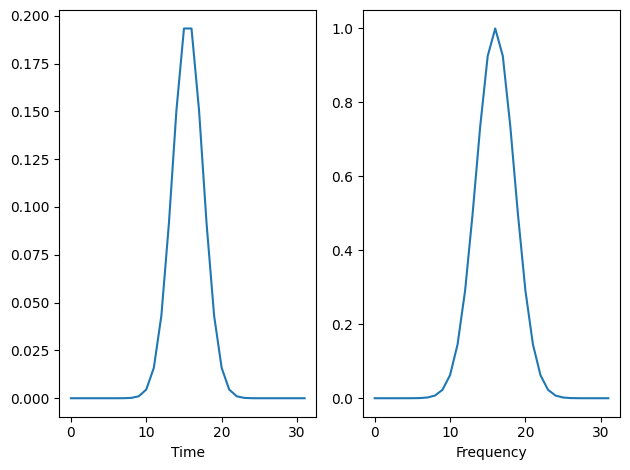

In [38]:
plot_gaussian(2)

Создадим взаимодействие, показывающее, что происходит при изменении стандартного значения:

In [39]:
slider = widgets.FloatSlider(min=0.1, max=10, value=2)
interact(plot_gaussian, std=slider);

interactive(children=(FloatSlider(value=2.0, description='std', max=10.0, min=0.1), Output()), _dom_classes=('…

При изменении параметра std (стандартного отклонения) гауссова окна его преобразование Фурье также изменяется.

При увеличении std гауссово окно становится более широким, а его пик уменьшается.

При уменьшении std гауссово окно становится более узким, а его пик увеличивается.

Таким образом, изменение параметра std гауссова окна позволяет управлять его свойствами и эффективностью фильтрации в зависимости от требуемого результата.

## Упражнение 8.3


Для начала создадим несколько окон и зададим стандартное отклонение окна Гаусса, чтобы сделать его похожим на другие:

In [40]:
M = 15
std = 2.5

gaussian = scipy.signal.windows.gaussian(M=M, std=std)   
bartlett = np.bartlett(M)
blackman = np.blackman(M)
hamming = np.hamming(M)
hanning = np.hanning(M)

windows = [blackman, gaussian, hanning, hamming]
names = ['blackman', 'gaussian', 'hanning', 'hamming']

for window in windows:
    window /= sum(window)

Распечатаем окна и посмотрим на них:

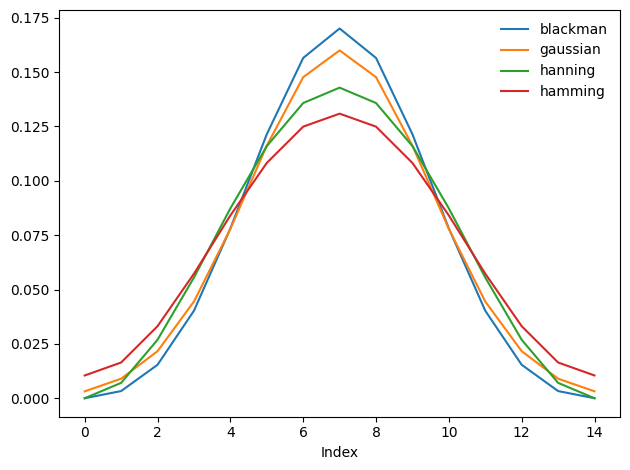

In [41]:
for window, name in zip(windows, names):
    plt.plot(window, label=name)

decorate(xlabel='Index')

Окна достаточно сильно похожи друг на друга.

Получим их ДПФ:

In [42]:
def zero_pad(array, n):
    res = np.zeros(n)
    res[:len(array)] = array
    return res

def plot_window_dfts(windows, names):
    for window, name in zip(windows, names):
        padded =  zero_pad(window, len(wave))
        dft_window = np.fft.rfft(padded)
        plt.plot(abs(dft_window), label=name)

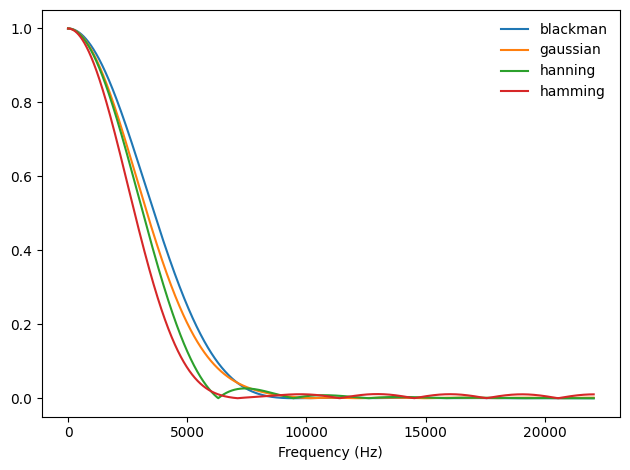

In [43]:
signal = SquareSignal(freq=10)
wave = signal.make_wave(duration=1.0, framerate=44100)

plot_window_dfts(windows, names)
decorate(xlabel='Frequency (Hz)')

Из сравнения окна Хэмминга, окна Блэкмана и окна Хэннинга можно сделать вывод, что окно Хэмминга имеет наиболее быстрое убывание боковых лепестков, а окно Блэкмана имеет наиболее медленное убывание. Кроме того, окно Хэннинга имеет наиболее заметные боковые лепестки по сравнению с другими окнами.

Изобразим график в логарифмическом масштабе, чтобы лучше видеть детали и относительные различия между величинами:

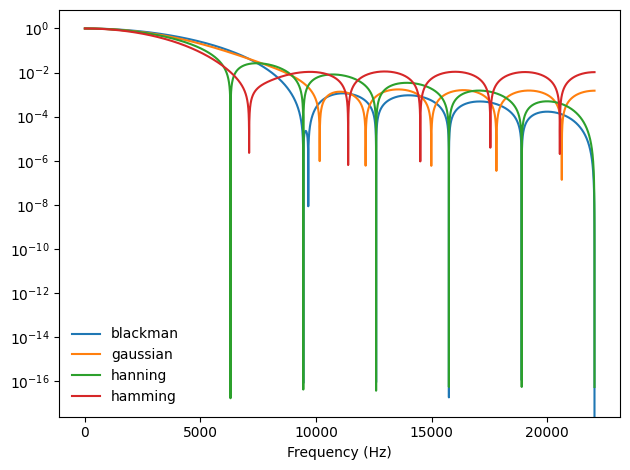

In [44]:
plot_window_dfts(windows, names)
decorate(xlabel='Frequency (Hz)', yscale='log')

Окна Хэмминга и Хэннинга, как видно из логарифмического масштаба, имеют более быстрое убывание боковых лепестков, чем окна Хэмминга-Ханна и Блэкмана. Это означает, что при использовании этих окон к сигналу боковые лепестки спектра уменьшаются быстрее, чем у других окон. Это может помочь уменьшить шум и искажения сигнала.